# TRABAJO FINAL
Curso: Machine Learning

Tema: Criptomonedas

Integrantes:
  - José Antonio Mayhua Hinostroza
  - Lucero Salome Manchay Paredes
  - Ibrahim Imanol Jordi Arquiñigo Jacinto

Grupo: 1

Fuente de la API: https://developers.coindesk.com/settings/api-keys

ADQUISICIÓN Y PREPROCESAMIENTO DE LOS DATOS

In [2]:
import requests
import pandas as pd
import time

# Tu API Key de CryptoCompare
API_KEY = 'f06c12bd4e08d97fecda3a74fbc4ee5f6fc556e5b3d853059ee2037077b2b5c6'

headers = {
    'authorization': f'Apikey {API_KEY}'
}

# Diccionario con tokens y sus narrativas
tokens = {
    'RNDR': 'Inteligencia Artificial',
    'FET': 'Inteligencia Artificial',
    'PEPE': 'Memes',
    'SHIB': 'Memes',
    'DOGE': 'Memes',
    'ENJ': 'Videojuegos',
    'MANA': 'Videojuegos',
    'ONDO': 'RWA'
}

# Rango: desde enero 2023 hasta ahora (~910 días)
dias_totales = 910

df_total = pd.DataFrame()

for symbol, narrativa in tokens.items():
    print(f'Descargando: {symbol} ({narrativa})')
    url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': symbol,
        'tsym': 'USD',
        'limit': dias_totales,
        'aggregate': 1
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        data = response.json()

        if data['Response'] != 'Success':
            print(f"No se pudo obtener datos para {symbol}")
            continue

        rows = []
        for d in data['Data']['Data']:
            rows.append({
                'symbol': symbol,
                'narrativa': narrativa,
                'date': pd.to_datetime(d['time'], unit='s'),
                'open': d['open'],
                'high': d['high'],
                'low': d['low'],
                'close': d['close'],
                'volume': d['volumeto']
            })

        df_token = pd.DataFrame(rows)
        df_total = pd.concat([df_total, df_token], ignore_index=True)
        print(f'{symbol} descargado ({len(df_token)} días)')
        time.sleep(1)

    except Exception as e:
        print(f"Error en {symbol}: {e}")
        continue

# Guardar todo en CSV
df_total.to_csv('cripto_historial_2023_2025.csv', index=False)
print("Archivo guardado: cripto_historial_2023_2025.csv")


Descargando: RNDR (Inteligencia Artificial)
RNDR descargado (911 días)
Descargando: FET (Inteligencia Artificial)
FET descargado (911 días)
Descargando: PEPE (Memes)
PEPE descargado (911 días)
Descargando: SHIB (Memes)
SHIB descargado (911 días)
Descargando: DOGE (Memes)
DOGE descargado (911 días)
Descargando: ENJ (Videojuegos)
ENJ descargado (911 días)
Descargando: MANA (Videojuegos)
MANA descargado (911 días)
Descargando: ONDO (RWA)
ONDO descargado (911 días)
Archivo guardado: cripto_historial_2023_2025.csv


In [3]:
import pandas as pd

# Cargar el archivo generado por CryptoCompare
df = pd.read_csv('cripto_historial_2023_2025.csv')

# Asegurarse que la columna 'date' esté en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar por símbolo y fecha
df = df.sort_values(by=['symbol', 'date']).reset_index(drop=True)

# Función para calcular el target por token
def calcular_target(df_token):
    df_token = df_token.copy().reset_index(drop=True)  # ← importante
    df_token['target'] = 0  # Inicializa en 0

    if len(df_token) < 31:
        return df_token  # No tiene suficientes días para hacer cálculo

    for i in range(len(df_token) - 30):
        precio_actual = df_token.loc[i, 'close']
        precios_futuros = df_token.loc[i+1:i+30, 'close']
        precio_max_futuro = precios_futuros.max()

        if precio_max_futuro >= 1.15 * precio_actual:
            df_token.loc[i, 'target'] = 1

    return df_token

# Aplicar la función por símbolo
df_target = df.groupby('symbol', group_keys=False).apply(calcular_target)

# Guardar el archivo final con columna target
df_target.to_csv('cripto_target_2023_2025.csv', index=False)
print("Archivo final con target guardado: cripto_target_2023_2025.csv")


Archivo final con target guardado: cripto_target_2023_2025.csv


/tmp/ipython-input-3-801025484.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_target = df.groupby('symbol', group_keys=False).apply(calcular_target)


# ANÁLISIS EDA
 1. Inspección de datos


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tu dataset final
df = pd.read_csv('cripto_target_2023_2025.csv')

In [5]:
print("Vista previa del dataset:")
df.head()

Vista previa del dataset:


,symbol,narrativa,date,open,high,low,close,volume,target
0,DOGE,Memes,2023-01-08,0.07217,0.07393,0.07124,0.07358,21678727.80,1
1,DOGE,Memes,2023-01-09,0.07358,0.07956,0.07296,0.07562,78383821.44,1
2,DOGE,Memes,2023-01-10,0.07562,0.07788,0.07389,0.07780,46975606.61,1
3,DOGE,Memes,2023-01-11,0.07780,0.07855,0.07474,0.07813,36269939.49,1
4,DOGE,Memes,2023-01-12,0.07813,0.08125,0.07542,0.08028,66723562.40,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7288 entries, 0 to 7287
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     7288 non-null   object 
 1   narrativa  7288 non-null   object 
 2   date       7288 non-null   object 
 3   open       7288 non-null   float64
 4   high       7288 non-null   float64
 5   low        7288 non-null   float64
 6   close      7288 non-null   float64
 7   volume     7288 non-null   float64
 8   target     7288 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 512.6+ KB


In [7]:
print("Total de registros:", len(df))

Total de registros: 7288


In [8]:
# Número de tokens distintos
print("\nNúmero de criptomonedas analizadas:", df['symbol'].nunique())


Número de criptomonedas analizadas: 8


In [9]:
# Distribución de clases en target
print("\nDistribución del target (0: no valorizó, 1: sí valorizó):")
print(df['target'].value_counts(normalize=True))


Distribución del target (0: no valorizó, 1: sí valorizó):
target
0    0.502333
1    0.497667
Name: proportion, dtype: float64


In [10]:
# Conteo por narrativa
print("\nCantidad de registros por narrativa:")
print(df['narrativa'].value_counts())


Cantidad de registros por narrativa:
narrativa
Memes                      2733
Videojuegos                1822
Inteligencia Artificial    1822
RWA                         911
Name: count, dtype: int64


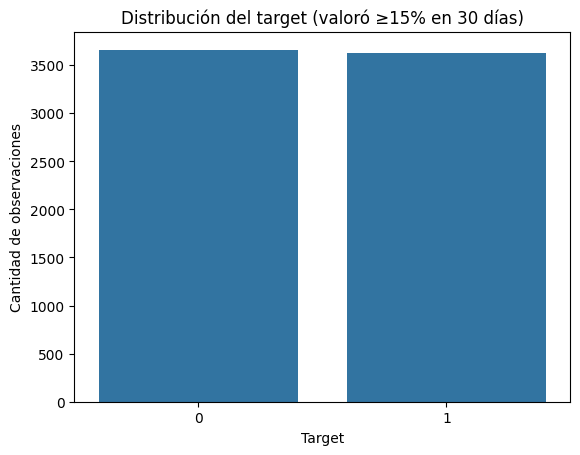

In [11]:
# Visualizaciones
# 1. Distribución del target
sns.countplot(data=df, x='target')
plt.title("Distribución del target (valoró ≥15% en 30 días)")
plt.xlabel("Target")
plt.ylabel("Cantidad de observaciones")
plt.show()

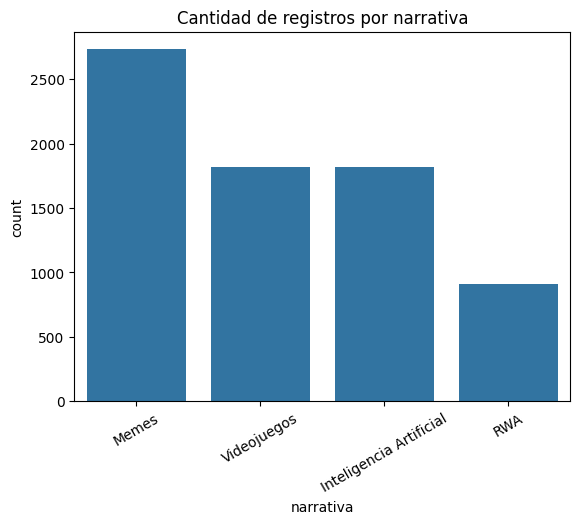

In [12]:
# 2. Distribución por narrativa
sns.countplot(data=df, x='narrativa', order=df['narrativa'].value_counts().index)
plt.title("Cantidad de registros por narrativa")
plt.xticks(rotation=30)
plt.show()

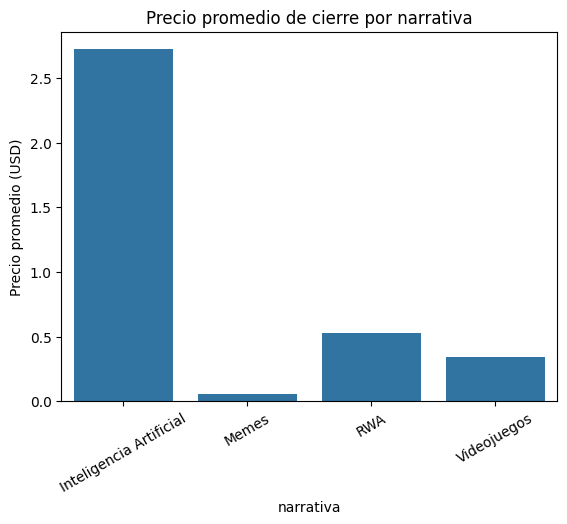

In [13]:
# 3. Precio promedio por narrativa
df_avg = df.groupby('narrativa')['close'].mean().reset_index()
sns.barplot(data=df_avg, x='narrativa', y='close')
plt.title("Precio promedio de cierre por narrativa")
plt.ylabel("Precio promedio (USD)")
plt.xticks(rotation=30)
plt.show()

2. Análisis de valores faltantes:

In [14]:
# Revisión de valores faltantes
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
symbol       0
narrativa    0
date         0
open         0
high         0
low          0
close        0
volume       0
target       0
dtype: int64


In [15]:
# Revisión de valores infinitos o no numéricos en columnas numéricas
print("\nValores no finitos detectados:")
print(df[["open", "high", "low", "close", "volume"]].isin([float('inf'), -float('inf')]).sum())


Valores no finitos detectados:
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [16]:
df.isna().mean()*100

,0
symbol,0.0
narrativa,0.0
date,0.0
open,0.0
high,0.0
low,0.0
close,0.0
volume,0.0
target,0.0


3. Creación de columnas adicionales

In [17]:
# Crear retorno diario
df['return_pct'] = df.groupby('symbol')['close'].pct_change() * 100

# Crear rango de volatilidad diaria
df['volatility'] = df['high'] - df['low']

# Media móvil de 7 días sobre el precio de cierre
df['ma_7'] = df.groupby('symbol')['close'].transform(lambda x: x.rolling(7).mean())

# Visualizar resultado de nuevas columnas
print("\nVista previa de las nuevas columnas:")
print(df[['symbol', 'date', 'close', 'return_pct', 'volatility', 'ma_7']].head(15))


Vista previa de las nuevas columnas:
   symbol        date    close  return_pct  volatility      ma_7
0    DOGE  2023-01-08  0.07358         NaN     0.00269       NaN
1    DOGE  2023-01-09  0.07562    2.772493     0.00660       NaN
2    DOGE  2023-01-10  0.07780    2.882835     0.00399       NaN
3    DOGE  2023-01-11  0.07813    0.424165     0.00381       NaN
4    DOGE  2023-01-12  0.08028    2.751824     0.00583       NaN
5    DOGE  2023-01-13  0.08452    5.281515     0.00656       NaN
6    DOGE  2023-01-14  0.08730    3.289162     0.00908  0.079604
7    DOGE  2023-01-15  0.08610   -1.374570     0.00511  0.081393
8    DOGE  2023-01-16  0.08366   -2.833914     0.00676  0.082541
9    DOGE  2023-01-17  0.08285   -0.968205     0.00300  0.083263
10   DOGE  2023-01-18  0.08004   -3.391672     0.01209  0.083536
11   DOGE  2023-01-19  0.08159    1.936532     0.00240  0.083723
12   DOGE  2023-01-20  0.08621    5.662459     0.00640  0.083964
13   DOGE  2023-01-21  0.08463   -1.832734     0.004

In [18]:
df = df.dropna(subset=['return_pct', 'ma_7'])

In [19]:
print(df.isna().sum())

symbol        0
narrativa     0
date          0
open          0
high          0
low           0
close         0
volume        0
target        0
return_pct    0
volatility    0
ma_7          0
dtype: int64


In [20]:
df.to_csv('cripto_limpio.csv', index=False)

4. Visualización de los datos

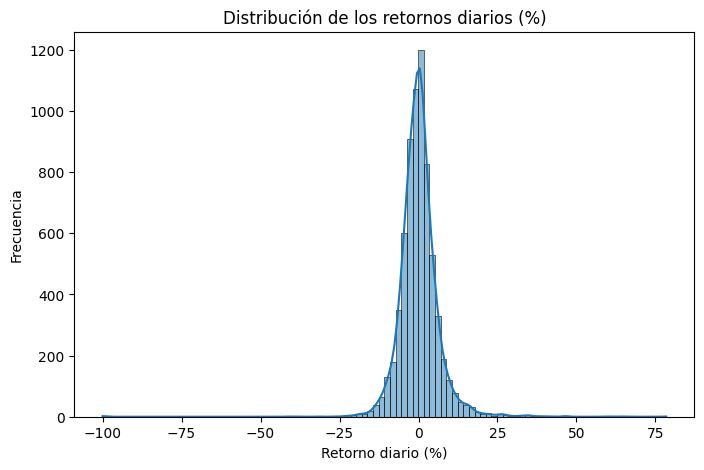

In [21]:
# Distribución de los retornos:
plt.figure(figsize=(8,5))
sns.histplot(df['return_pct'], bins=100, kde=True)
plt.title("Distribución de los retornos diarios (%)")
plt.xlabel("Retorno diario (%)")
plt.ylabel("Frecuencia")
plt.show()

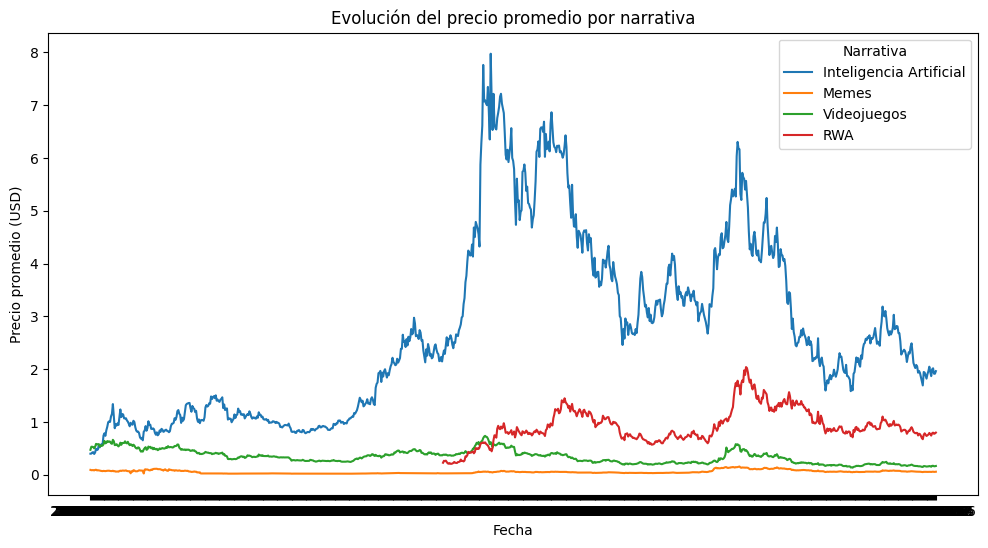

In [22]:
# Evolución temporal del precio promedio por narrativa:
df_grouped = df.groupby(['date', 'narrativa'])['close'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x='date', y='close', hue='narrativa')
plt.title("Evolución del precio promedio por narrativa")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio (USD)")
plt.legend(title='Narrativa')
plt.show()

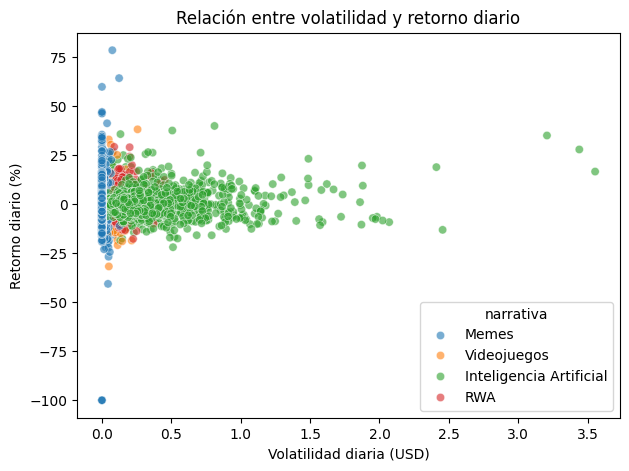

In [23]:
# Relación entre volatilidad y retornos:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='volatility', y='return_pct', hue='narrativa', alpha=0.6)
plt.title("Relación entre volatilidad y retorno diario")
plt.xlabel("Volatilidad diaria (USD)")
plt.ylabel("Retorno diario (%)")
plt.show()

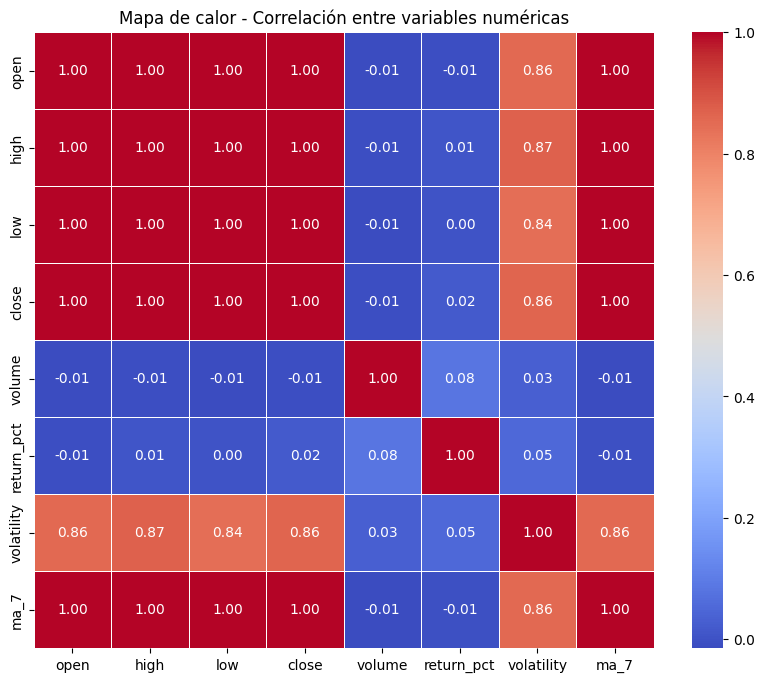

In [24]:
# Filtramos solo las variables numéricas relevantes
variables_numericas = ['open', 'high', 'low', 'close', 'volume', 'return_pct', 'volatility', 'ma_7']

# Cálculo de la matriz de correlación
correlaciones = df[variables_numericas].corr()

# Visualización del mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor - Correlación entre variables numéricas")
plt.show()

Entrenamiento

In [25]:
import numpy as np
# 1. Cargar dataset limpio
df = pd.read_csv('cripto_limpio.csv')

# 2. Crear X e y
X = df.drop(columns=['symbol', 'date', 'target'])
y = df['target']

# 3. Codificar variable categórica (narrativa)
X = pd.get_dummies(X, columns=['narrativa'], drop_first=True)

# 4. Reemplazar infinitos con NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# 5. Eliminar filas con NaN
X.dropna(inplace=True)

# 6. Alinear y con los índices válidos de X
y = y.loc[X.index]

In [26]:
from sklearn.model_selection import train_test_split

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

RANDOM FOREST

In [27]:
#librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest")
print(confusion_matrix(y_test, rf_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, rf_pred))

Random Forest
[[537 186]
 [213 436]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       723
           1       0.70      0.67      0.69       649

    accuracy                           0.71      1372
   macro avg       0.71      0.71      0.71      1372
weighted avg       0.71      0.71      0.71      1372



SVM

In [29]:
from sklearn.svm import SVC
# Escalar los datos (muy importante para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo SVM con kernel RBF
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicciones
svm_pred = svm_model.predict(X_test_scaled)

# Evaluación
print("Support Vector Machine (SVM)")
print("Matriz de confusión:")
print(confusion_matrix(y_test, svm_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, svm_pred))


Support Vector Machine (SVM)
Matriz de confusión:
[[566 157]
 [418 231]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.58      0.78      0.66       723
           1       0.60      0.36      0.45       649

    accuracy                           0.58      1372
   macro avg       0.59      0.57      0.55      1372
weighted avg       0.58      0.58      0.56      1372



In [30]:
print("🔍 COMPARACIÓN AVANZADA: RANDOM FOREST vs SVM")
print("="*60)

from sklearn.metrics import roc_auc_score, roc_curve
import joblib

print("🎯 Entrenando SVM con probabilidades...")
svm_prob_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_prob_model.fit(X_train_scaled, y_train)
svm_prob_pred = svm_prob_model.predict(X_test_scaled)

print("SVM con Probabilidades:")
print(confusion_matrix(y_test, svm_prob_pred))
print(classification_report(y_test, svm_prob_pred))

# Comparación de modelos
modelos_comparacion = {
    'Random Forest': {
        'pred': rf_pred,
        'prob': rf_model.predict_proba(X_test)[:, 1],
        'modelo': rf_model,
        'usa_scaler': False
    },
    'SVM': {
        'pred': svm_prob_pred,
        'prob': svm_prob_model.predict_proba(X_test_scaled)[:, 1],
        'modelo': svm_prob_model,
        'usa_scaler': True
    }
}

print("\n📊 COMPARACIÓN DE MÉTRICAS:")
print("="*40)

# Calcular todas las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for nombre, datos in modelos_comparacion.items():
    acc = accuracy_score(y_test, datos['pred'])
    prec = precision_score(y_test, datos['pred'])
    rec = recall_score(y_test, datos['pred'])
    f1 = f1_score(y_test, datos['pred'])
    auc = roc_auc_score(y_test, datos['prob'])

    print(f"\n{nombre}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  AUC-ROC:   {auc:.4f}")

# Identificar mejor modelo
f1_scores = {nombre: f1_score(y_test, datos['pred']) for nombre, datos in modelos_comparacion.items()}
mejor_modelo_nombre = max(f1_scores, key=f1_scores.get)

print(f"\n🏆 MEJOR MODELO: {mejor_modelo_nombre}")
print(f"📈 F1-Score: {f1_scores[mejor_modelo_nombre]:.4f}")

# Guardar mejor modelo
mejor_modelo_data = modelos_comparacion[mejor_modelo_nombre]
joblib.dump(mejor_modelo_data['modelo'], 'mejor_modelo_final.pkl')

if mejor_modelo_data['usa_scaler']:
    joblib.dump(scaler, 'scaler_final.pkl')
    print("✅ Modelo y scaler guardados")
else:
    print("✅ Modelo guardado")

🔍 COMPARACIÓN AVANZADA: RANDOM FOREST vs SVM
🎯 Entrenando SVM con probabilidades...
SVM con Probabilidades:
[[566 157]
 [418 231]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.66       723
           1       0.60      0.36      0.45       649

    accuracy                           0.58      1372
   macro avg       0.59      0.57      0.55      1372
weighted avg       0.58      0.58      0.56      1372


📊 COMPARACIÓN DE MÉTRICAS:

Random Forest:
  Accuracy:  0.7092
  Precision: 0.7010
  Recall:    0.6718
  F1-Score:  0.6861
  AUC-ROC:   0.7990

SVM:
  Accuracy:  0.5809
  Precision: 0.5954
  Recall:    0.3559
  F1-Score:  0.4455
  AUC-ROC:   0.6000

🏆 MEJOR MODELO: Random Forest
📈 F1-Score: 0.6861
✅ Modelo guardado



📊 GENERANDO VISUALIZACIONES...


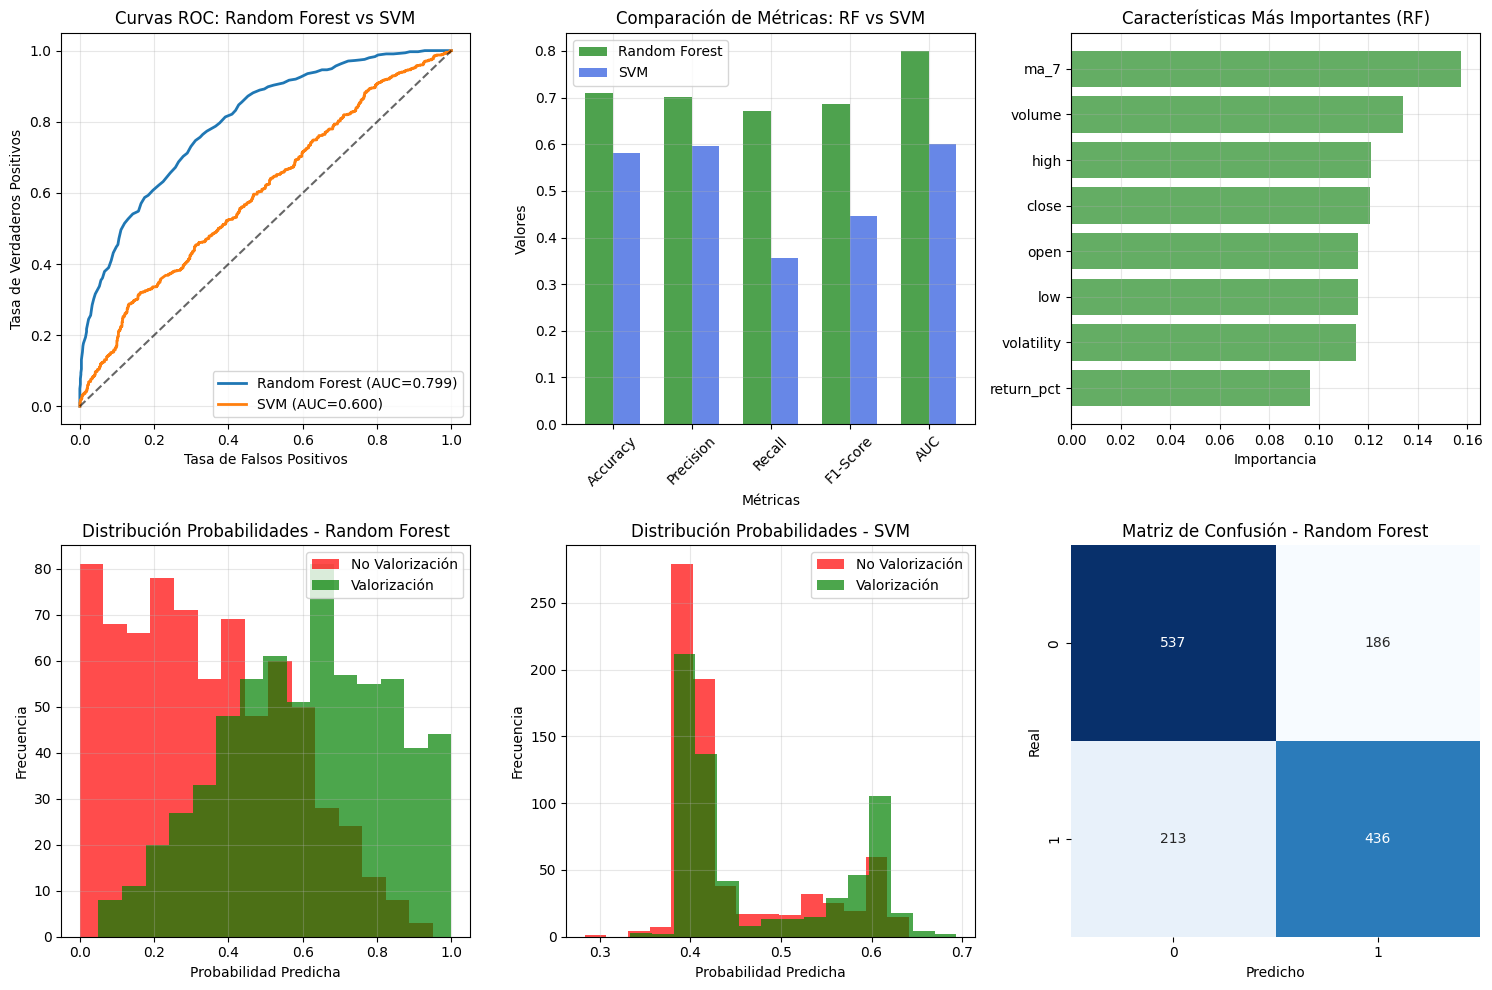

✅ Visualizaciones completadas


In [31]:
print("\n📊 GENERANDO VISUALIZACIONES...")

plt.figure(figsize=(15, 10))

# Subplot 1: Curvas ROC
plt.subplot(2, 3, 1)
for nombre, datos in modelos_comparacion.items():
    fpr, tpr, _ = roc_curve(y_test, datos['prob'])
    auc = roc_auc_score(y_test, datos['prob'])
    plt.plot(fpr, tpr, label=f'{nombre} (AUC={auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC: Random Forest vs SVM')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Comparación de métricas
plt.subplot(2, 3, 2)
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
rf_valores = [
    accuracy_score(y_test, modelos_comparacion['Random Forest']['pred']),
    precision_score(y_test, modelos_comparacion['Random Forest']['pred']),
    recall_score(y_test, modelos_comparacion['Random Forest']['pred']),
    f1_score(y_test, modelos_comparacion['Random Forest']['pred']),
    roc_auc_score(y_test, modelos_comparacion['Random Forest']['prob'])
]
svm_valores = [
    accuracy_score(y_test, modelos_comparacion['SVM']['pred']),
    precision_score(y_test, modelos_comparacion['SVM']['pred']),
    recall_score(y_test, modelos_comparacion['SVM']['pred']),
    f1_score(y_test, modelos_comparacion['SVM']['pred']),
    roc_auc_score(y_test, modelos_comparacion['SVM']['prob'])
]

x = np.arange(len(metricas))
width = 0.35

plt.bar(x - width/2, rf_valores, width, label='Random Forest', alpha=0.8, color='forestgreen')
plt.bar(x + width/2, svm_valores, width, label='SVM', alpha=0.8, color='royalblue')

plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Comparación de Métricas: RF vs SVM')
plt.xticks(x, metricas, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Importancia de características (Random Forest)
plt.subplot(2, 3, 3)
feature_names = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-8:]  # Top 8

plt.barh(range(len(indices)), importances[indices], color='forestgreen', alpha=0.7)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importancia')
plt.title('Características Más Importantes (RF)')
plt.grid(True, alpha=0.3)

# Subplot 4: Distribución de probabilidades - Random Forest
plt.subplot(2, 3, 4)
rf_prob = modelos_comparacion['Random Forest']['prob']
plt.hist(rf_prob[y_test==0], alpha=0.7, label='No Valorización', bins=15, color='red')
plt.hist(rf_prob[y_test==1], alpha=0.7, label='Valorización', bins=15, color='green')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.title('Distribución Probabilidades - Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: Distribución de probabilidades - SVM
plt.subplot(2, 3, 5)
svm_prob = modelos_comparacion['SVM']['prob']
plt.hist(svm_prob[y_test==0], alpha=0.7, label='No Valorización', bins=15, color='red')
plt.hist(svm_prob[y_test==1], alpha=0.7, label='Valorización', bins=15, color='green')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.title('Distribución Probabilidades - SVM')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Matrices de confusión
plt.subplot(2, 3, 6)
# Matriz del mejor modelo
cm = confusion_matrix(y_test, modelos_comparacion[mejor_modelo_nombre]['pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusión - {mejor_modelo_nombre}')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.tight_layout()
plt.show()

print("✅ Visualizaciones completadas")

In [32]:
print("\n🔍 CONFIGURANDO SISTEMA DE PREDICCIÓN...")

import requests

# Usar TU API key
API_KEY = 'f06c12bd4e08d97fecda3a74fbc4ee5f6fc556e5b3d853059ee2037077b2b5c6'
headers = {'authorization': f'Apikey {API_KEY}'}

def obtener_datos_cripto(symbol, days=30):
    """Función para obtener datos de la API"""
    url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {'fsym': symbol, 'tsym': 'USD', 'limit': days, 'aggregate': 1}

    try:
        response = requests.get(url, headers=headers, params=params)
        data = response.json()

        if data['Response'] != 'Success':
            return None

        rows = []
        for d in data['Data']['Data']:
            rows.append({
                'date': pd.to_datetime(d['time'], unit='s'),
                'open': d['open'], 'high': d['high'], 'low': d['low'],
                'close': d['close'], 'volume': d['volumeto']
            })

        return pd.DataFrame(rows)
    except Exception as e:
        print(f"Error obteniendo {symbol}: {e}")
        return None

def procesar_datos_prediccion(df_new, narrativa):
    """Usar EXACTAMENTE tu preprocesamiento"""
    if df_new is None or len(df_new) < 7:
        return None

    # Tu código exacto
    df_new['return_pct'] = df_new['close'].pct_change() * 100
    df_new['volatility'] = df_new['high'] - df_new['low']
    df_new['ma_7'] = df_new['close'].rolling(7).mean()
    df_new = df_new.dropna()

    if len(df_new) == 0:
        return None

    # Última observación
    ultima_fila = df_new.iloc[-1:].copy()
    ultima_fila['narrativa'] = narrativa

    # Preparar características
    features = ultima_fila[['open', 'high', 'low', 'close', 'volume', 'return_pct', 'volatility', 'ma_7', 'narrativa']]
    features_encoded = pd.get_dummies(features, columns=['narrativa'], drop_first=True)

    # Asegurar mismas columnas que entrenamiento
    columnas_modelo = ['open', 'high', 'low', 'close', 'volume', 'return_pct', 'volatility', 'ma_7',
                       'narrativa_Memes', 'narrativa_RWA', 'narrativa_Videojuegos']

    for col in columnas_modelo:
        if col not in features_encoded.columns:
            features_encoded[col] = 0

    return features_encoded[columnas_modelo], df_new['close'].iloc[-1]

def predecir_token(symbol, narrativa):
    """Predicción usando el mejor modelo"""
    print(f"🔍 Analizando {symbol} ({narrativa})")

    # Obtener y procesar datos
    df_new = obtener_datos_cripto(symbol)
    resultado = procesar_datos_prediccion(df_new, narrativa)

    if resultado is None:
        print(f"  ❌ No se pudieron procesar datos")
        return None

    features, precio = resultado

    # Usar el mejor modelo identificado
    try:
        if mejor_modelo_nombre == 'Random Forest':
            pred = rf_model.predict(features)[0]
            prob = rf_model.predict_proba(features)[0][1]
        else:  # SVM
            features_scaled = scaler.transform(features)
            pred = svm_prob_model.predict(features_scaled)[0]
            prob = svm_prob_model.predict_proba(features_scaled)[0][1]

        return {
            'symbol': symbol,
            'narrativa': narrativa,
            'prediccion': pred,
            'probabilidad': prob,
            'precio_actual': precio
        }
    except Exception as e:
        print(f"  ❌ Error en predicción: {e}")
        return None

print(f"✅ Sistema configurado con modelo: {mejor_modelo_nombre}")


🔍 CONFIGURANDO SISTEMA DE PREDICCIÓN...
✅ Sistema configurado con modelo: Random Forest



📊 ANÁLISIS DE CRIPTOMONEDAS PARA PERÚ C-INVERSIONES
🔍 Analizando 8 tokens con Random Forest...
🔍 Analizando AI (Inteligencia Artificial)
🔍 Analizando GALA (Videojuegos)
🔍 Analizando OCEAN (Inteligencia Artificial)
🔍 Analizando BONK (Memes)
🔍 Analizando FLOKI (Memes)
🔍 Analizando SAND (Videojuegos)
🔍 Analizando TRU (RWA)
🔍 Analizando AGIX (Inteligencia Artificial)

✅ Análisis completado: 8/8 tokens

🔍 RESULTADOS DETALLADOS:
• AI (Inteligencia Artificial)
  Probabilidad: 68.00%
  Precio: $0.1109
  Estado: 🟡 MEDIA CONFIANZA
  Predicción: ✅ Valorización

• GALA (Videojuegos)
  Probabilidad: 40.00%
  Precio: $0.0143
  Estado: 🔴 BAJA CONFIANZA
  Predicción: ❌ Sin valorización

• OCEAN (Inteligencia Artificial)
  Probabilidad: 39.00%
  Precio: $0.2997
  Estado: 🔴 BAJA CONFIANZA
  Predicción: ❌ Sin valorización

• BONK (Memes)
  Probabilidad: 33.00%
  Precio: $0.0000
  Estado: 🔴 BAJA CONFIANZA
  Predicción: ❌ Sin valorización

• FLOKI (Memes)
  Probabilidad: 10.00%
  Precio: $0.0001
  Estado:

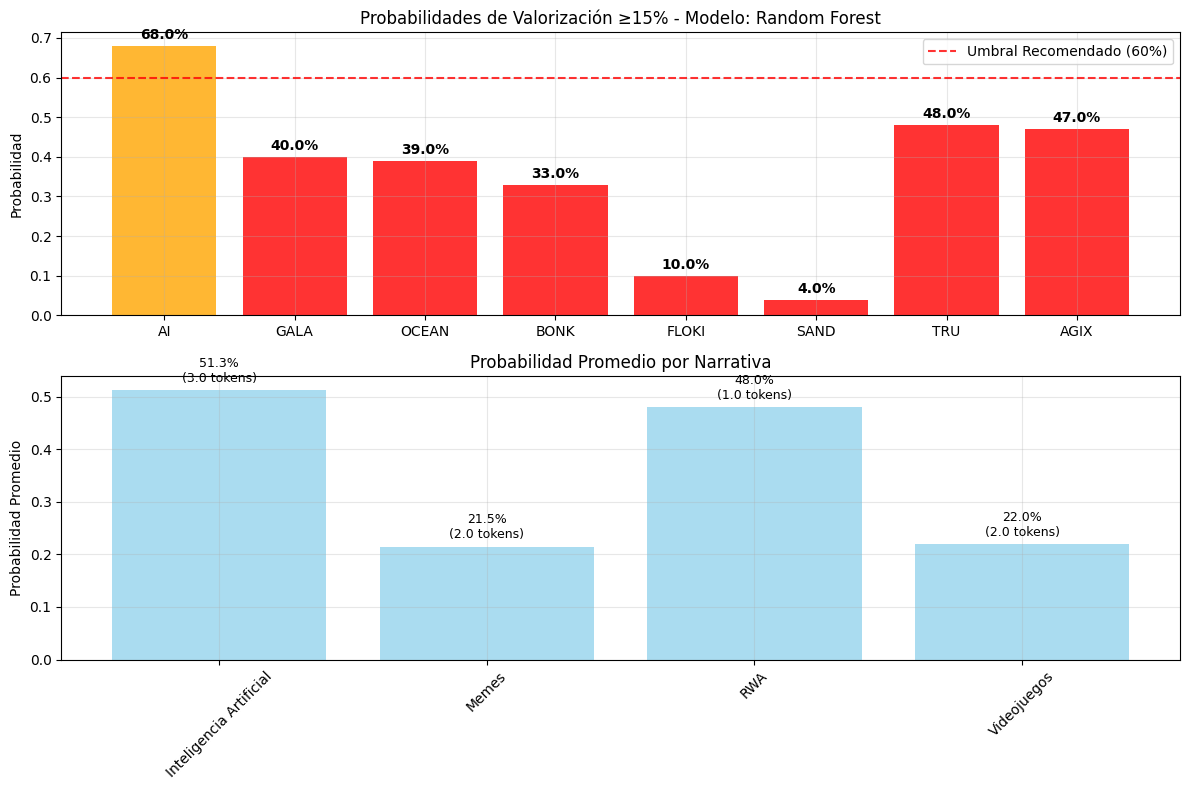


📊 TABLA RESUMEN FINAL:
symbol               narrativa  probabilidad  precio_actual
    AI Inteligencia Artificial          0.68         0.1109
  GALA             Videojuegos          0.40         0.0143
 OCEAN Inteligencia Artificial          0.39         0.2997
  BONK                   Memes          0.33         0.0000
 FLOKI                   Memes          0.10         0.0001
  SAND             Videojuegos          0.04         0.2467
   TRU                     RWA          0.48         0.0242
  AGIX Inteligencia Artificial          0.47         0.4963

📈 ESTADÍSTICAS FINALES:
  • Probabilidad promedio: 36.1%
  • Tokens prometedores (≥60%): 1/8
  • Modelo utilizado: Random Forest
  • F1-Score del modelo: 0.6861

🎉 ANÁLISIS COMPLETO FINALIZADO
🏆 Proyecto listo para presentar a Perú C-Inversiones


In [33]:
print("\n📊 ANÁLISIS DE CRIPTOMONEDAS PARA PERÚ C-INVERSIONES")
print("="*65)

# Tokens a analizar
tokens_analizar = {
    'AI': 'Inteligencia Artificial',
    'GALA': 'Videojuegos',
    'OCEAN': 'Inteligencia Artificial',
    'BONK': 'Memes',
    'FLOKI': 'Memes',
    'SAND': 'Videojuegos',
    'TRU': 'RWA',
    'AGIX': 'Inteligencia Artificial'
}

print(f"🔍 Analizando {len(tokens_analizar)} tokens con {mejor_modelo_nombre}...")

# Realizar predicciones
resultados = []
for symbol, narrativa in tokens_analizar.items():
    resultado = predecir_token(symbol, narrativa)
    if resultado:
        resultados.append(resultado)

if resultados:
    df_resultados = pd.DataFrame(resultados)

    print(f"\n✅ Análisis completado: {len(df_resultados)}/{len(tokens_analizar)} tokens")

    # Mostrar resultados detallados
    print(f"\n🔍 RESULTADOS DETALLADOS:")
    for _, row in df_resultados.iterrows():
        if row['probabilidad'] > 0.7:
            estado = "🟢 ALTA CONFIANZA"
        elif row['probabilidad'] > 0.5:
            estado = "🟡 MEDIA CONFIANZA"
        else:
            estado = "🔴 BAJA CONFIANZA"

        pred_texto = "✅ Valorización" if row['prediccion'] == 1 else "❌ Sin valorización"

        print(f"• {row['symbol']} ({row['narrativa']})")
        print(f"  Probabilidad: {row['probabilidad']:.2%}")
        print(f"  Precio: ${row['precio_actual']:.4f}")
        print(f"  Estado: {estado}")
        print(f"  Predicción: {pred_texto}")
        print()

    # Generar recomendaciones
    tokens_recomendados = df_resultados[df_resultados['probabilidad'] >= 0.6].sort_values('probabilidad', ascending=False)

    print("🚀 RECOMENDACIONES PARA PERÚ C-INVERSIONES:")
    print("="*50)

    if len(tokens_recomendados) > 0:
        print("📈 TOKENS RECOMENDADOS (≥60% probabilidad):")
        for i, (_, row) in enumerate(tokens_recomendados.iterrows(), 1):
            print(f"  {i}. {row['symbol']} - {row['probabilidad']:.1%} (${row['precio_actual']:.4f})")

        print(f"\n💡 ESTRATEGIA SUGERIDA:")
        print(f"  • Diversificar entre {len(tokens_recomendados)} tokens recomendados")
        print(f"  • Asignar máximo 5% del portafolio por token")
        print(f"  • Stop-loss: -15% | Take-profit: +15%")
        print(f"  • Revisar predicciones semanalmente")
    else:
        print("❌ Ningún token cumple criterio mínimo (60%)")
        print("💡 Sugerencia: Esperar mejores oportunidades")

    # Guardar resultados
    df_resultados.to_csv('analisis_final_peru_c_inversiones.csv', index=False)
    print(f"\n💾 Resultados guardados en CSV")

    # Visualización final
    plt.figure(figsize=(12, 8))

    # Gráfico principal
    plt.subplot(2, 1, 1)
    colors = ['darkgreen' if p >= 0.7 else 'orange' if p >= 0.5 else 'red' for p in df_resultados['probabilidad']]
    bars = plt.bar(df_resultados['symbol'], df_resultados['probabilidad'], color=colors, alpha=0.8)

    plt.title(f'Probabilidades de Valorización ≥15% - Modelo: {mejor_modelo_nombre}')
    plt.ylabel('Probabilidad')
    plt.axhline(y=0.6, color='red', linestyle='--', alpha=0.8, label='Umbral Recomendado (60%)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Añadir valores en barras
    for bar, prob in zip(bars, df_resultados['probabilidad']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{prob:.1%}', ha='center', va='bottom', fontweight='bold')

    # Gráfico por narrativa
    plt.subplot(2, 1, 2)
    narrativa_stats = df_resultados.groupby('narrativa').agg({
        'probabilidad': 'mean',
        'symbol': 'count'
    }).round(3)

    plt.bar(narrativa_stats.index, narrativa_stats['probabilidad'], alpha=0.7, color='skyblue')
    plt.title('Probabilidad Promedio por Narrativa')
    plt.ylabel('Probabilidad Promedio')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Añadir valores
    for i, (narrativa, data) in enumerate(narrativa_stats.iterrows()):
        plt.text(i, data['probabilidad'] + 0.01, f"{data['probabilidad']:.1%}\n({data['symbol']} tokens)",
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Tabla resumen final
    print(f"\n📊 TABLA RESUMEN FINAL:")
    print(df_resultados[['symbol', 'narrativa', 'probabilidad', 'precio_actual']].round(4).to_string(index=False))

    # Estadísticas finales
    prob_promedio = df_resultados['probabilidad'].mean()
    tokens_prometedores = len(df_resultados[df_resultados['probabilidad'] >= 0.6])

    print(f"\n📈 ESTADÍSTICAS FINALES:")
    print(f"  • Probabilidad promedio: {prob_promedio:.1%}")
    print(f"  • Tokens prometedores (≥60%): {tokens_prometedores}/{len(df_resultados)}")
    print(f"  • Modelo utilizado: {mejor_modelo_nombre}")
    print(f"  • F1-Score del modelo: {f1_scores[mejor_modelo_nombre]:.4f}")

else:
    print("❌ No se obtuvieron resultados")

print(f"\n🎉 ANÁLISIS COMPLETO FINALIZADO")